# Objective : 
## The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Step 1 : Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation

In [369]:
# fundamental libraries
import numpy as np
import pandas as pd

# plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# model and metrics libraries for measuring performance
from sklearn.linear_model import LogisticRegression # we have to identify if customer buying personal loan.
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats

# warnings
import warnings
warnings.filterwarnings('ignore')

In [370]:
customer = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [371]:
customer.head() # check top 5 and tail 5 for proper read.


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [372]:
customer.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [373]:
print ("Shape of the given data set : ", customer.shape)

Shape of the given data set :  (5000, 14)


### Basic Raw Inferences from above:
    - 5000 rows with 14 columns
    - Age, Experience,Income, CCAvg, Mortgage are numerical values. These are quantitative.
    - Zipcode - candidate for encoding - labelencoding or one hot(might make dataset large) or drop or categorize & code it? we will decide as we analyze more. Nominal qualitative data. Categorical Data.
    - Education - is a categorical variable. Candidate for one hot. Nominal qualitative
    - Family though looks numerical the range is very less and discrete. Can be considered as Categorical data.
    - "Personal Loan" is our target variable
    - securities account, cd accts, online, cc are required to see the relationship between bank and customer & how it translates to personal loan. We can cross-tab this. They seem to be already binarized. We can use as is. they all are binary qualitative features.
    Additional thoughts.
    - ID, zip code - we need to see if this is required for the logit modelling else we can potentially drop them. check for uniqueness.
    - we can try to bin age , experience, income, ccaavg from distinct numerical to categorical & then have category codes. # binnings -. we can cross tab this to personal loan.   
    

In [374]:
# let's do info on the customer dataset & also see if there are any null values.

customer.info()
print("******************")
print("Null Values anywhere : ", customer.isnull().values.any())
# customer.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
******************
Null Values anywhere :  False


### Inference

    - We see that there are NO NULL values
    - Almost all except for CC avge is integer. CC avg should have decimal notation.
    - The bank relationship parameters like  pers loan, sec a/c, cd a/c, online, cc - is more of categorical - can we convert them to data type Category? 
    - As mentioned before we can try converting income, ccavg, mortgage to categorical ranges via bins and then convert back to codes
    - No need to impute for NULL values.

In [375]:
# Let's see the maths and analyze the distribution of the feature variables.
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [376]:
customer.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

### Inference
    - We see that Age, Experience are almost normally distributed.
    - We see minimum is NEGATIVE in Experience - candidate for imputing in coming steps.
    -  The bank relationship attributes like pers loan, sec, cd, online, cc - have 0 values - but they are more for yes or no.
    - Mortgage and ccavg can be 0. So no need to impute
    - Zip code - minimum is seen as 4 digits. - no need to worry about this. Zip code can be dropped. LEt's see the uniqueness and decide further. 
    - Same for ID - let's see uniqueness to decide for dropping

In [377]:
# Let's check for uniqueness

customer.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### Inference
    - We can drop ID as it has 5000 unique values and will not provide good information to algorithm
    - Zip code can be made into dummy variables - but there are quite a bit. Is it really required? We can do a group by and then cross tab with the personal loan to see how zipcode caters to personal loan approval. Labelencoding? or can we still Drop? or categorize & code it?

### EDA: Study the data distribution in each attribute and target variable, share your findings 

    - Number of unique in each column?
    - Number of people with zero mortgage?
    - Number of people with zero credit card spending per month?
    - Value counts of all categorical columns.
    - Univariate and Bivariate
    - Get data model ready


In [378]:
 # No. of Unique in each column in original data set
customer.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### Inference
    - As we see above ID has all unique values
    - Age, Experience - seems like lots of customers are in a particular range. More similar demography can be grouped.
    - Zip code - also seems like almost 1:10 ratio. So, we can try to bin Zip code also
    - Income, CCAvg, Mortgage - surprisingly has less uniqueness. Will making it bin be useful in prediction? 
    - For :Personal Loan, Securities Account, CD Account, Online, Credit Card are more classification and provided with one hot coding :)
    - Education needs one hot
    - Family size - quantitative but can be considered categorical?

In [379]:
# Number of people with zero mortgage?

customer['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

### Inference
    - There are 3462 customers with 0 Mortgage Loan. We don't need to impute or drop them as this is is required for predicting personal loan.

In [380]:
#  Number of people with zero credit card spending per month?

customer[customer['CCAvg']==0]['CCAvg'].value_counts()

0.0    106
Name: CCAvg, dtype: int64

### Inference
    - 106 customers have zero credit card spend / month. We don't need to impute or drop them as this is required for predicting personal loan

In [381]:
#Value counts of all categorical columns.

customer
# Age, Experience, Income, CCAvg, Mortgage, Family are quantitative numerical data 
# Education, ZIP Code, personal loan, CC, Online, CD, Securities account are categorical columns.
# Family has just 4 classes - can be considered categorical


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [382]:
#Drop ID and create a new df cust_df.
cust_df=customer.drop('ID', axis=1)
cust_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [383]:
## VALUE COUNT OF CATEGORICAL COLUMNS
for i in ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family', 'ZIP Code']:
    print(cust_df[i].value_counts().sort_index())
    

1    2096
2    1403
3    1501
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
0    2016
1    2984
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64
1    1472
2    1296
3    1010
4    1222
Name: Family, dtype: int64
9307     1
90005    5
90007    6
90009    8
90011    3
        ..
96091    4
96094    2
96145    1
96150    4
96651    6
Name: ZIP Code, Length: 467, dtype: int64


In [384]:
# VALUE COUNT OF CATEGORICAL COLUMNS WITH PERCENTAGE
for i in ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family', 'ZIP Code']:
        print((cust_df[i].value_counts(normalize=True)*100).sort_index())

1    41.92
2    28.06
3    30.02
Name: Education, dtype: float64
0    90.4
1     9.6
Name: Personal Loan, dtype: float64
0    89.56
1    10.44
Name: Securities Account, dtype: float64
0    93.96
1     6.04
Name: CD Account, dtype: float64
0    40.32
1    59.68
Name: Online, dtype: float64
0    70.6
1    29.4
Name: CreditCard, dtype: float64
1    29.44
2    25.92
3    20.20
4    24.44
Name: Family, dtype: float64
9307     0.02
90005    0.10
90007    0.12
90009    0.16
90011    0.06
         ... 
96091    0.08
96094    0.04
96145    0.02
96150    0.08
96651    0.12
Name: ZIP Code, Length: 467, dtype: float64


### Insights
    - Education :
        - Undergrad customers are the highest (~42%) in the customer base followed by Professionals(~30%)and then the Grads (~28%)
    
    - Personal Loan:
        - 480 customers (~9.6%) accepted the personal Loan offered the rest did not. 
    
    - Securities Account:
        - ~10% of the customers have securities account while the rest do not.
    
    - CD Account:
        - Only ~6% have CD account while the rest do not.
    
    - Online:
        - ~60% use online banking while the rest do not.
    
    - Credit Card Usage:
        - ~30% use Credit Card usage and rest do not.
    
    - Family:
        - Although this is numerical variable, there are only 4 unique values. We will consider this as Categorical. People with Family size of 1 and 2 are high in the dataset. (29% and 26%). Followed by family size of 4 and 3.(24% and 20%).
    
    - ZIP Code:
        - Zip code is nominal variable. If we use one hot encoding, the size becomes extremely large. So, using bins for classification.

### # UNIVARIATE FOR NUMERICAL COLUMNS

In [385]:
# We have already dropped the ID.
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


DIST PLOT for Age


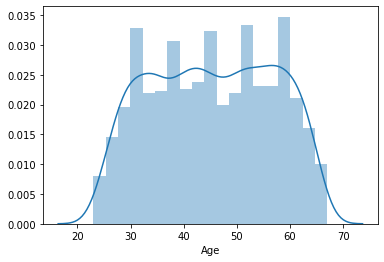

Mean is 45.3384, Median is 45.0, Skewness is -0.02934068151284029, Mode is 0    35
dtype: int64

DIST PLOT for Experience


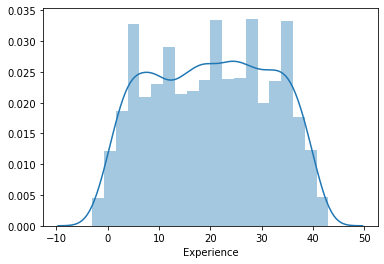

Mean is 20.1046, Median is 20.0, Skewness is -0.026324688402384513, Mode is 0    32
dtype: int64

DIST PLOT for CCAvg


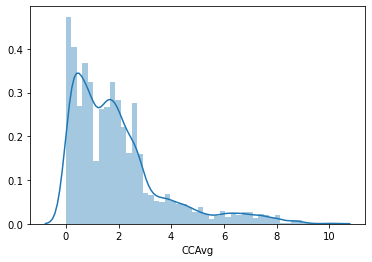

Mean is 1.9379380000000053, Median is 1.5, Skewness is 1.5984433366678663, Mode is 0    0.3
dtype: float64

DIST PLOT for Mortgage


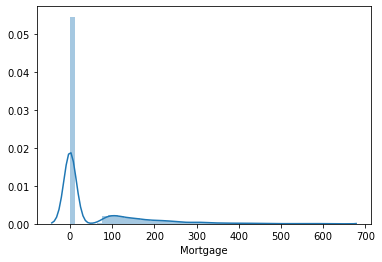

Mean is 56.4988, Median is 0.0, Skewness is 2.1040023191079444, Mode is 0    0
dtype: int64

DIST PLOT for Income


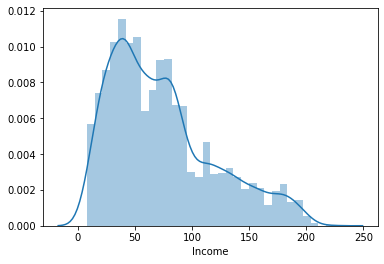

Mean is 73.7742, Median is 64.0, Skewness is 0.8413386072610816, Mode is 0    44
dtype: int64



In [386]:
# Univariate for numerical columns:
for i in ['Age','Experience','CCAvg','Mortgage', 'Income']:
    print("DIST PLOT for {0}".format(i))
    sns.distplot(cust_df[i])
    plt.show()
    print("Mean is {0}, Median is {1}, Skewness is {2}, Mode is {3}".format(cust_df[i].mean(), 
                                                                            cust_df[i].median(), 
                                                                            cust_df[i].skew(), 
                                                                            cust_df[i].mode()
                                                                           )
         )
    print()

### Insights
    - For Age and Experience:
          The distribution is almost normal. Mean and median is almost same and very minimal.
    Note: Experience is in negative. We need to correct it.
    
    - For CCAvg, Mortgage, and Income:
          The distribution is skewed towards right. As this relates to bank applicants we don't correct them or impute 0 Values. 
        

In [387]:
# Imputing the negative values for EXPERIENCE attribute
## Check for Experience column with values 0 and below.
cust_df[cust_df['Experience']<=0]['Experience'].value_counts().sort_index()
## We see there are about 52 values in negative and 66 with 0. Let's do a cross tab. 
###That's 1% of the dataset with Experience negative
## 0 Experience customers can be possible. No need to impute them.


-3     4
-2    15
-1    33
 0    66
Name: Experience, dtype: int64

In [388]:
pd.crosstab(cust_df['Experience'], cust_df['Personal Loan'], normalize='columns')*100
#percentage of values of approval is 0. So, we can possibly impute negative exp with 0.
# cust_df[cust_df['Experience']<=0].groupby(['Age', 'Income'])['Experience'].value_counts().to_frame()

Personal Loan,0,1
Experience,,
-3,0.088496,0.000000
-2,0.331858,0.000000
-1,0.730088,0.000000
0,1.305310,1.458333
1,1.460177,1.666667
2,1.681416,1.875000
3,2.477876,3.541667
4,2.300885,1.875000
5,2.920354,2.916667


In [389]:
# Before imputing lets describe 
cust_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [390]:
print(cust_df['Experience'][cust_df['Experience'] < 0].value_counts())

-1    33
-2    15
-3     4
Name: Experience, dtype: int64


In [391]:
cust_df['Experience'][cust_df['Experience'] < 0]=0
cust_df['Experience'][cust_df['Experience'] <= 0].value_counts()

0    118
Name: Experience, dtype: int64

In [392]:
cust_df.describe().T
# we see after imputation ; not much change in mean and std for Experience. So we are good. 


,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


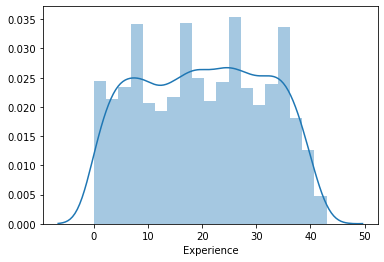

Mean is 20.1196, Median is 20.0, Skewness is -0.017220705364694253, Mode is 0    32
dtype: int64


In [393]:
#The distplot also shows. 
sns.distplot(cust_df['Experience'])
plt.show()
print("Mean is {0}, Median is {1}, Skewness is {2}, Mode is {3}".format(cust_df['Experience'].mean(), 
                                                                            cust_df['Experience'].median(), 
                                                                            cust_df['Experience'].skew(), 
                                                                            cust_df['Experience'].mode()
                                                                           )
         )

# UNIVARIATE FOR CATEGORICAL COLUMNS

COUNT PLOT for Education


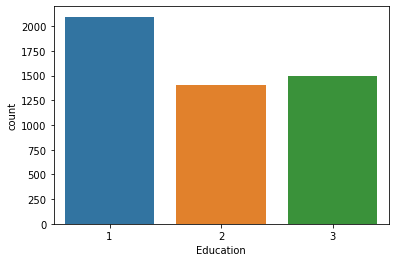


COUNT PLOT for Personal Loan


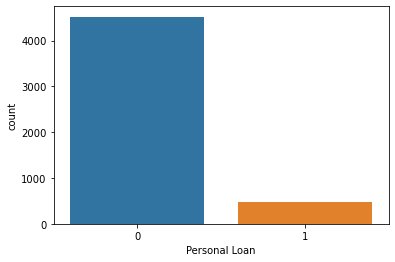


COUNT PLOT for Securities Account


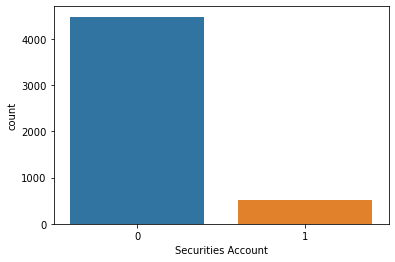


COUNT PLOT for CD Account


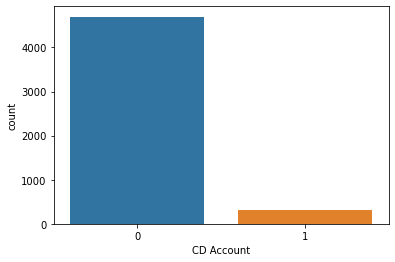


COUNT PLOT for Online


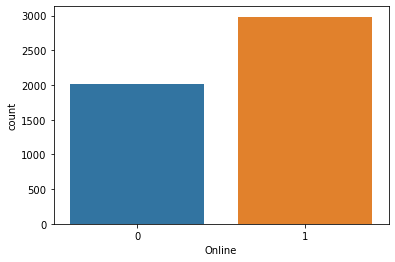


COUNT PLOT for CreditCard


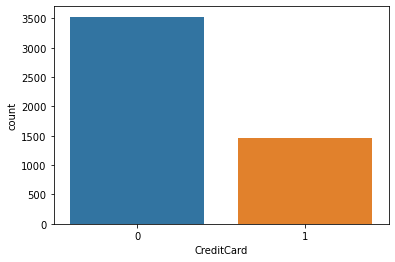


COUNT PLOT for Family


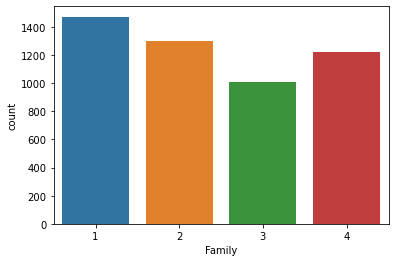


COUNT PLOT for ZIP Code


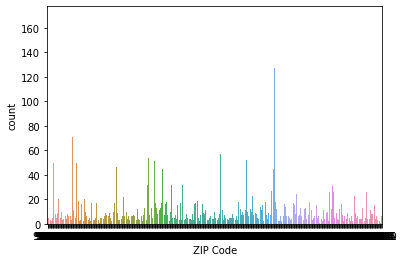

In [394]:
# Use countplot - histo for categorical!
for i in ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family', 'ZIP Code']:
    print("COUNT PLOT for {0}".format(i))
    sns.countplot(cust_df[i]) # use for bivariate, hue=cust_df['Personal Loan'])
    plt.show()
    print()   

### Insights

- Education :
    - Undergrad customers are the highest  in the customer base followed by Professionalsand then the Grads

- Personal Loan:
    - Very less people accepted the Personal Loan

- Securities Account:
    - Very less of the customers have securities account while the rest do not.

- CD Account:
    - Very less of the customers have CD account while the rest do not.

- Online:
    - online banking is adapted more

- Credit Card Usage:
    - adaption for CC seems like around 35%

- Family:
    - Although this is numerical variable, there are only 4 unique values. We will consider this as Categorical. People with Family size of 1 and 2 are high in the dataset. Followed by family size of 4 and 3.
- ZIP Code:
    - Zip code is nominal variable. If we use one hot encoding, the size becomes extremely large. So, using bins for classification.

In [395]:
# Bin ZIP CODE and then do Univariate Analysis
customerZ = cust_df.copy()
bin_edges = [0, 91000, 92000,93000,94000, 95000, 96000,97000] # edges to define intervals
bin_labels = ['0-91000', '91001-92000', '92001-93000','93001-94000', 
              '94001-95000', '95001-96000', '96001-97000'] # labels to denote each interval
customerZ['ZIP Code'] = pd.cut(customerZ['ZIP Code'], bins=bin_edges , labels=bin_labels)
customerZ['ZIP Code'].value_counts().sort_index()

0-91000         704
91001-92000     565
92001-93000     988
93001-94000     416
94001-95000    1472
95001-96000     815
96001-97000      40
Name: ZIP Code, dtype: int64

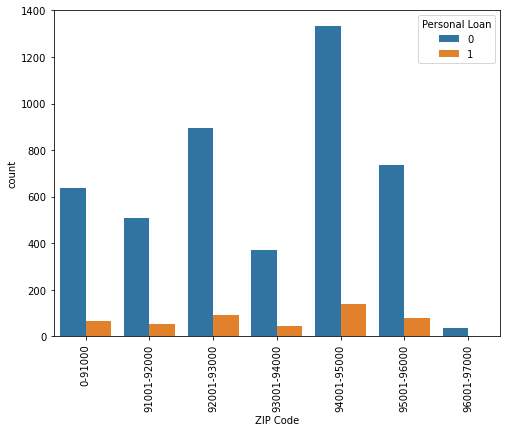

In [396]:
customerZ['ZIP Code']

plt.figure(figsize=(8,6))
sns.countplot(x = 'ZIP Code',data=customerZ,hue='Personal Loan')
plt.xticks(rotation=90)
plt.show()

In [397]:
customerZ.groupby('Personal Loan')['ZIP Code'].value_counts()

Personal Loan  ZIP Code   
0              94001-95000    1334
               92001-93000     894
               95001-96000     735
               0-91000         637
               91001-92000     510
               93001-94000     373
               96001-97000      37
1              94001-95000     138
               92001-93000      94
               95001-96000      80
               0-91000          67
               91001-92000      55
               93001-94000      43
               96001-97000       3
Name: ZIP Code, dtype: int64

### Insights
    - We see that from binning the Zip code and doing a count plot, we see that customers living in ZIP code ranges 94001-95000 is the max customer base and also the max no. of customers accepted the personal loan
    - This insight is needed for predicting if a prospective customer will accept the load offer or not. SO I AM NOT DROPPING THIS COLUMN, rather use the ZIP CODE as bins and then convert into cat codes.

In [398]:
# To consolidate different versions of datasets
customer # original data set
cust_df # data set after dropping ID

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [399]:
customerZ # data set with binned Zip Code
customerZ.info()
#  we need to convert the categorical ZIP Code into numbers wrt their orders.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP Code            5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal Loan       5000 non-null   int64   
 9   Securities Account  5000 non-null   int64   
 10  CD Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(11)
memory usage: 474.1 KB


In [400]:
## Code the categorical column
customerZ['ZIP Code'] = customerZ['ZIP Code'].cat.codes

In [401]:
customerZ['ZIP Code']

0       1
1       0
2       4
3       4
4       1
       ..
4995    2
4996    2
4997    3
4998    0
4999    2
Name: ZIP Code, Length: 5000, dtype: int8

# BIVARIATE ANALYSIS & Preparing data for modelling.

### Let's see the relationship with each feature to the target feature, Personal Loan

####  PLEASE NOTE am using here the Dataset CustomerZ where I have binned the Zip Codes instead of dropping that column, I think it might give Bank a better information in understanding the location of the customer along with other parameters in determining if he will accept the loan or not.

In [402]:
# Use Group By and Cross Tabs

# With Numerical(Quantitative) Features
customerZ.info()
customerZ.groupby('Personal Loan').mean()
customerZ.groupby('Personal Loan').median()

# makes more sense for  Income, CCAvg, Mortgage..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int8   
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11), int8(1)
memory usage: 473.8 KB


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.0,20.0,59.0,3,2.0,1.4,2.0,0.0,0.0,0.0,1.0,0.0
1,45.0,20.0,142.5,3,3.0,3.8,2.0,0.0,0.0,0.0,1.0,0.0


## Bi-Variate of continuous numerical Income, CCAvg, Mortgage with Target

In [403]:
# Insights makes more sense for  Income, CCAvg, Mortgage..
print("MEAN")
print(customerZ.groupby('Personal Loan')['Income', 'CCAvg', 'Mortgage'].mean())

print("\nMEDIAN")
print(customerZ.groupby('Personal Loan')['Income', 'CCAvg', 'Mortgage'].median())

MEAN
                   Income     CCAvg    Mortgage
Personal Loan                                  
0               66.237389  1.729009   51.789381
1              144.745833  3.905354  100.845833

MEDIAN
               Income  CCAvg  Mortgage
Personal Loan                         
0                59.0    1.4       0.0
1               142.5    3.8       0.0


### Insights
    - We see that Income CCAvg Mortgage do impact the acceptance of the personal loan offer.

## Let's do bi-variate of target with Age, Experience - more discrete numerical variables.

In [404]:
customerZ.groupby('Personal Loan')['Age', 'Experience'].mean()

,Age,Experience
Personal Loan,,
0,45.367257,20.148894
1,45.066667,19.843750


In [405]:
customerZ.groupby('Personal Loan')['Age', 'Experience'].median()

,Age,Experience
Personal Loan,,
0,45,20
1,45,20


### Insights
    - Age and Experience doesnt seem to have any impact on target variable. 

## And now bivariate for ZIP Code -  we categorized and converted to codes

In [406]:
pd.crosstab(customerZ['ZIP Code'],customerZ['Personal Loan'], normalize='index')*100

Personal Loan,0,1
ZIP Code,,
0,90.482955,9.517045
1,90.265487,9.734513
2,90.485830,9.514170
3,89.663462,10.336538
4,90.625000,9.375000
5,90.184049,9.815951
6,92.500000,7.500000


### Insights
    - the bins of zip code seems to be of almost equal spread &influence on personal Loan though the category 3 and 6 seems to be swayed to max and min for approval. We should check how this feature influences final model using coefficients.

# Bi-variate for the binary variables

In [407]:
## CC, Online, CD Acct, Securities Account

pd.crosstab(customerZ['CreditCard'],customerZ['Personal Loan'], normalize='index')*100

Personal Loan,0,1
CreditCard,,
0,90.453258,9.546742
1,90.272109,9.727891


In [408]:
pd.crosstab(customerZ['CD Account'],customerZ['Personal Loan'], normalize='index')*100

Personal Loan,0,1
CD Account,,
0,92.762878,7.237122
1,53.642384,46.357616


In [409]:
pd.crosstab(customerZ['Securities Account'],customerZ['Personal Loan'], normalize='index')*100

Personal Loan,0,1
Securities Account,,
0,90.620813,9.379187
1,88.505747,11.494253


In [410]:
pd.crosstab(customerZ['Online'],customerZ['Personal Loan'], normalize='index')*100

Personal Loan,0,1
Online,,
0,90.625000,9.375000
1,90.247989,9.752011


## Insights

    - Online adaption seems to provide almost same distribution in personal loan acceptance, we should check how this feature influences final model using coefficients
    
    - People owning Sec account tend to accept personal loan a bit higher than those wont don't have one.
    
    - People owning CD account  accept  personal loan more than those who dont have
    
    - CreditCard adaption seems to provide almost same distribution in personal loan acceptance, we should check how this feature influences final model using coefficients

## Education, Family need one hot coding. Let's do it.

In [411]:
customerDF = pd.get_dummies(customerZ, prefix=['Education', 'Family'], columns=['Education','Family'],drop_first=True) #This function does One-Hot-Encoding on categorical text


In [412]:
print(customerZ.info())
customerZ.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int8   
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11), int8(1)
memory usage: 473.8 KB
None


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,1,4,1.6,1,0,0,1,0,0,0
1,45,19,34,0,3,1.5,1,0,0,1,0,0,0
2,39,15,11,4,1,1.0,1,0,0,0,0,0,0
3,35,9,100,4,1,2.7,2,0,0,0,0,0,0
4,35,8,45,1,4,1.0,2,0,0,0,0,0,1


In [413]:
print(customerDF.info())
customerDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int8   
 4   CCAvg               5000 non-null   float64
 5   Mortgage            5000 non-null   int64  
 6   Personal Loan       5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
 11  Education_2         5000 non-null   uint8  
 12  Education_3         5000 non-null   uint8  
 13  Family_2            5000 non-null   uint8  
 14  Family_3            5000 non-null   uint8  
 15  Family_4            5000 non-null   uint8  
dtypes: flo

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4
0,25,1,49,1,1.6,0,0,1,0,0,0,0,0,0,0,1
1,45,19,34,0,1.5,0,0,1,0,0,0,0,0,0,1,0
2,39,15,11,4,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,4,2.7,0,0,0,0,0,0,1,0,0,0,0
4,35,8,45,1,1.0,0,0,0,0,0,1,1,0,0,0,1


### Used one hot for Education  above in CustomerZ dataset. The new dataset is CustomerDF. Used drop_first=True to reduce the additional columns.

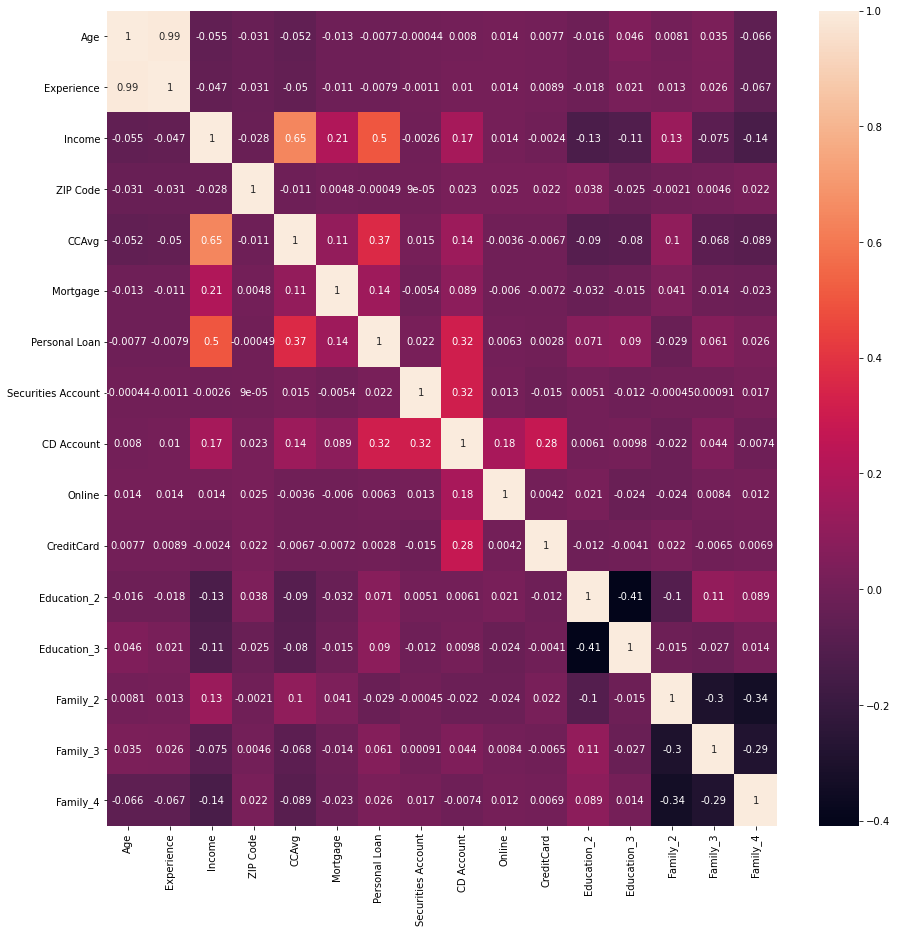

In [414]:
## Let's check correlation.

plt.figure(figsize=(15,15))
sns.heatmap(customerDF.corr(), annot=True) 

## Insights

    - From Correlation - the lighter the heat, the more correlation
    - We see that the target Variable - 'Personal Loan' - has good correlation with Income, CCAvg, CD Account. Mortgage has to an extent correlation to the target. We will see how the coefficient looks for these.

# MODEL BUILDING USING LOGISTIC REGRESSION FROM SKLEARN

In [415]:
customerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int8   
 4   CCAvg               5000 non-null   float64
 5   Mortgage            5000 non-null   int64  
 6   Personal Loan       5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
 11  Education_2         5000 non-null   uint8  
 12  Education_3         5000 non-null   uint8  
 13  Family_2            5000 non-null   uint8  
 14  Family_3            5000 non-null   uint8  
 15  Family_4            5000 non-null   uint8  
dtypes: flo

In [416]:
X = customerDF.drop('Personal Loan', axis=1)
Y = customerDF['Personal Loan'].astype('category')     
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int8   
 4   CCAvg               5000 non-null   float64
 5   Mortgage            5000 non-null   int64  
 6   Securities Account  5000 non-null   int64  
 7   CD Account          5000 non-null   int64  
 8   Online              5000 non-null   int64  
 9   CreditCard          5000 non-null   int64  
 10  Education_2         5000 non-null   uint8  
 11  Education_3         5000 non-null   uint8  
 12  Family_2            5000 non-null   uint8  
 13  Family_3            5000 non-null   uint8  
 14  Family_4            5000 non-null   uint8  
dtypes: float64(1), int64(8), int8(1), uint8(5)
memory usage

In [417]:
X

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4
0,25,1,49,1,1.6,0,1,0,0,0,0,0,0,0,1
1,45,19,34,0,1.5,0,1,0,0,0,0,0,0,1,0
2,39,15,11,4,1.0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,4,2.7,0,0,0,0,0,1,0,0,0,0
4,35,8,45,1,1.0,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,2,1.9,0,0,0,1,0,0,1,0,0,0
4996,30,4,15,2,0.4,85,0,0,1,0,0,0,0,0,1
4997,63,39,24,3,0.3,0,0,0,0,0,0,1,1,0,0
4998,65,40,49,0,0.5,0,0,0,1,0,1,0,0,1,0


In [418]:
Y.to_frame()

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


# Split the data into training and test set in the ratio of 70:30 respectively

In [419]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

# MODEL A : Here, I have binned Zip Code & encoded Education and Family. Probably in next model, I can drop Zip Code and see? And also bin ccavg, income, mortgage in another model?

### Fit, Prediction, and Metrics

In [420]:
#Use the Logistic Regression model to predict whether the customer will take a personal loan or not. 
#Print all the metrics related to evaluating the model performance 
#(accuracy, recall, precision, f1score, and roc_auc_score). 
#Draw a heatmap to display confusion matrix

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

modelA = LogisticRegression(random_state=6579,fit_intercept=False, solver="liblinear")
#Create an instance of the Logit and fit the model on train data.
modelA.fit(X_train, Y_train)                    

LogisticRegression(fit_intercept=False, random_state=6579, solver='liblinear')

In [421]:
#Predict
Y_predict = modelA.predict(X_test)              # Predicting the target variable on test data

In [422]:
# Observe the predicted and test(observed) feature and targets in a dataframe.

Z = X_test.copy()#  create a copy of the X test
Z['True Personal Loan'] = Y_test # add a column of observed Y
Z['Predicted Personal Loan'] = Y_predict # add a column of predicted Y
Z.head()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4,True Personal Loan,Predicted Personal Loan
2764,31,5,84,1,2.9,105,0,0,0,1,0,1,0,0,0,0,0
4767,35,9,45,0,0.9,101,1,0,0,0,0,0,0,1,0,0,0
3814,34,9,35,4,1.3,0,0,0,0,0,0,0,0,1,0,0,0
3499,49,23,114,4,0.3,286,0,0,1,0,0,0,0,0,0,0,0
2735,36,12,70,2,2.6,165,0,0,1,0,1,0,0,1,0,0,0


In [423]:
cmModelA = confusion_matrix(Y_test,Y_predict)
cmModelA

array([[1339,   12],
       [  60,   89]], dtype=int64)

In [424]:
# Confusion Matrix HeatMap function

def draw_confusion_matrix(true, predicted):
    cm = confusion_matrix(true, predicted)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [425]:
# Metrics
#(accuracy, recall, precision, f1score, and roc_auc_score). 
#Draw a heatmap to display confusion matrix

## ACCURACY
print("Trainig accuracy %age ",round(modelA.score(X_train,Y_train)*100,2))  
print()
print("Testing accuracy %age ",round(modelA.score(X_test, Y_test)*100,2))

Trainig accuracy %age  96.09

Testing accuracy %age  95.2


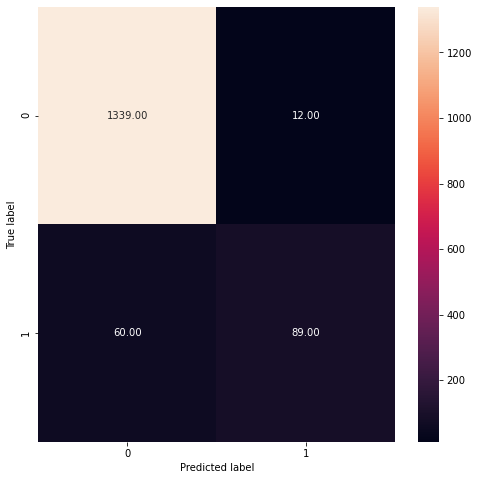

In [426]:
# CONFUSION MATRIX

draw_confusion_matrix(Y_test, Y_predict)

## Insights from Confusion Matrix


True Positives (TP): We correctly predicted that 89 customers will accept the personal loan when offered

True Negatives (TN): We correctly predicted that 1339 customers will NOT accept the personal loan when offered

False Positives (FP): We incorrectly predicted that 12 will accept the personal loan (a "Type I error") but they in fact did not.

False Negatives (FN): We incorrectly predicted that 60 will NOT accept (a "Type II error") but they in fact accepted.

In [427]:
print("MODEL A : Recall / Sensitivity % :",round(recall_score(Y_test,Y_predict)*100,2))
print()
print("MODEL A: Precision % :",round(precision_score(Y_test,Y_predict)*100,2))
print()
print("MODEL A: F1 Score % :",round(f1_score(Y_test,Y_predict)*100,2))
print()
print("MDEL A: Roc Auc Score % :",round(roc_auc_score(Y_test,Y_predict)*100,2))

MODEL A : Recall / Sensitivity % : 59.73

MODEL A: Precision % : 88.12

MODEL A: F1 Score % : 71.2

MDEL A: Roc Auc Score % : 79.42


In [428]:
## COEFFICIENT of FEATURES in DATAFRAME:

FeatureDF= pd.DataFrame()
FeatureDF['Features'] = X_train.columns
FeatureDF['Coefficient'] = np.round(abs(modelA.coef_.T),3)
FeatureDF.sort_values(by='Coefficient',ascending=False)
 


,Features,Coefficient
11,Education_3,3.542
10,Education_2,3.235
7,CD Account,3.029
13,Family_3,1.987
14,Family_4,1.274
9,CreditCard,0.849
6,Securities Account,0.790
8,Online,0.523
0,Age,0.448
1,Experience,0.447


In [429]:
#For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

Test_Data = X_test.copy()
Test_Data['True Personal Loan'] = Y_test
Test_Data['Predicted Personal Loan'] = Y_predict
Test_Data.loc[Test_Data['True Personal Loan'] != Test_Data['Predicted Personal Loan']]

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4,True Personal Loan,Predicted Personal Loan
932,51,27,112,4,1.8,0,1,1,1,1,1,0,0,1,0,0,1
3347,65,41,78,2,2.0,0,0,1,1,1,0,1,0,1,0,0,1
3271,52,27,93,0,4.1,0,0,0,0,1,1,0,0,0,1,1,0
349,26,2,60,3,3.0,132,0,0,0,0,0,0,1,0,0,1,0
927,65,40,95,5,3.7,138,0,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,43,19,83,4,3.6,0,0,0,0,1,0,1,0,0,1,1,0
1143,33,7,120,4,3.2,0,0,0,1,0,0,1,0,0,0,1,0
1793,35,9,113,4,0.8,0,0,0,1,0,0,1,0,1,0,1,0
813,50,25,130,4,1.1,0,0,0,1,0,1,0,0,0,0,1,0


# Give conclusion related to the Business understanding of your model?

##### Important Features:
 - Top Features that influence the Model's output:
     - Education_3 (Advanced/Professional)
     - Education_2 (Graduate)
     - Family Size
     - CD Account
     - Credit Card
     - Securities Account
 - Mortgage and Zip Code seems to have minimal influence to the model output.
 - The online adaption also contributed in influencing the model ouput.
 
#### Important Metric:
Here, the goal of the model is : likelihood of a liability customer buying personal loans.
So, keeping this in mind - we need to minimize the number of False Positives. If we predict that there will be high number of personal loan acceptance but in fact there is less acceptance - then bank will lose in its marketing budget for its campaign. PRECISION should be high. Rather, if the False Negatives is high here, it is good as the bank predicted no acceptance, but in fact there was more acceptance. In our model (with solver=liblinear) we see

    - Recall is 59.73%
    - Precision is 88.12%
    - F1 score 71.2
    
### - In fact I tried with different models with following criteria:
 - no hot encoding - the precision was the least
 - education only hot encoded - precision was 87.%
 - education and family hot encoded - precision was 88% with solver - Liblinear
 
### Learning : I should try more methods like removing Zip code, and probably bin the ccavg, mortgage, income - to see better models?I am not sure. 

### Also, solver first time used without liblinear and also using the solver lbfgs - precision and F1 was less, but recall was high.